In [451]:
import pandas as pd
import numpy as np

#  Data Importing from https://www2.stetson.edu/~jrasp/data.htm 
# Titanic Dataset 

In [452]:
df=pd.read_csv("Titanic.csv")

In [453]:
df.shape

(2201, 6)

In [454]:
df.head(2200)

,CLASS,AGE,SEX,SURVIVE,Unnamed: 4,CLASS.1
0,1,1,1,1,NaN,0=crew
1,1,1,1,1,NaN,1=first
2,1,1,1,1,NaN,2=second
3,1,1,1,1,NaN,3=third
4,1,1,1,1,NaN,NaN
...,...,...,...,...,...,...
2195,0,1,0,1,NaN,NaN
2196,0,1,0,1,NaN,NaN
2197,0,1,0,1,NaN,NaN
2198,0,1,0,0,NaN,NaN


#  Splitting feature vectors and labels

In [455]:
# X is feature vectors
X = df[['CLASS', 'AGE', 'SEX','SURVIVE']]

In [456]:
X.head(2200)

,CLASS,AGE,SEX,SURVIVE
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
2195,0,1,0,1
2196,0,1,0,1
2197,0,1,0,1
2198,0,1,0,0


In [457]:
# Y is labels

In [458]:
Y = df[['SURVIVE']]

In [459]:
Y.head(2200)

,SURVIVE
0,1
1,1
2,1
3,1
4,1
...,...
2195,1
2196,1
2197,1
2198,0


#  Covariance Matrix of features

In [460]:
correlation_matrix = X.corr() #Transposing Features and passing it into numpy Covarience matrix
print(correlation_matrix)

            CLASS       AGE       SEX   SURVIVE
CLASS    1.000000 -0.229181 -0.258094 -0.000228
AGE     -0.229181  1.000000  0.111013 -0.097575
SEX     -0.258094  0.111013  1.000000 -0.455605
SURVIVE -0.000228 -0.097575 -0.455605  1.000000


#  Eigen Vectors and Eigen Values from Covariance Matrix

In [461]:
# Lingalg.eig() is used to calculate Eigen values and Eigen Vectors
eig_values, eig_vectors = np.linalg.eig(correlation_matrix)

In [462]:
print('Eigenvectors \n%s' %eig_vectors)

Eigenvectors 
[[-0.40810061  0.38873944 -0.59863162  0.56918866]
 [ 0.35810006  0.13693342  0.55015855  0.74184847]
 [ 0.64337804  0.67951463 -0.24156092 -0.25685187]
 [-0.53970634  0.60695202  0.52973019 -0.24436087]]


In [463]:
eig_values

array([1.60769085, 0.46776658, 1.10667919, 0.81786338])

In [464]:
eig_values=np.sort(eig_values)

In [465]:
print('\n  Eigen Values \n %s' %np.sort(eig_values))


  Eigen Values 
 [0.46776658 0.81786338 1.10667919 1.60769085]


In [466]:
# I reduce dimension to 2 dimension, since 2 eigenvector has 67.85% variances
(100*((eig_values[3]+eig_values[2] )/ sum(eig_values)))

67.85925085597425

# Projecting data point onto selected Eigen Vector

In [467]:
eig_vectors.T[0]

array([-0.40810061,  0.35810006,  0.64337804, -0.53970634])

In [468]:
eig_vectors.T[2]

array([-0.59863162,  0.55015855, -0.24156092,  0.52973019])

In [469]:
PC1 = X.dot(eig_vectors.T[0])

In [470]:
PC2 = X.dot(eig_vectors.T[2])

In [471]:
PC1

0       0.053671
1       0.053671
2       0.053671
3       0.053671
4       0.053671
          ...   
2196   -0.181606
2197   -0.181606
2198    0.358100
2199    0.358100
2200    0.358100
Length: 2201, dtype: float64

In [472]:
result = pd.DataFrame({'PC1':PC1,'PC2':PC2})
result['Survive'] = Y

In [473]:
result.head(2200)

,PC1,PC2,Survive
0,0.053671,0.239696,1
1,0.053671,0.239696,1
2,0.053671,0.239696,1
3,0.053671,0.239696,1
4,0.053671,0.239696,1
...,...,...,...
2195,-0.181606,1.079889,1
2196,-0.181606,1.079889,1
2197,-0.181606,1.079889,1
2198,0.358100,0.550159,0


In [474]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1, 'PCA result')

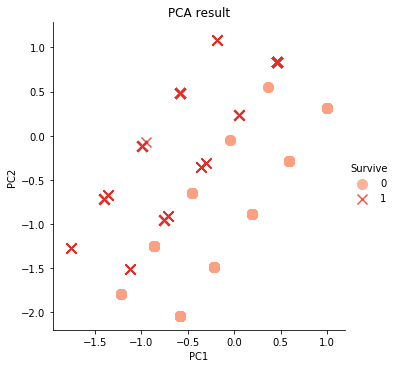

In [475]:
sns.lmplot('PC1', 'PC2', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 100}, # marker size
           hue="Survive",markers=["o", "x"],palette='Reds'
          ) # color

#  For Title
plt.title('PCA result')